<a href="https://colab.research.google.com/github/Siriyakon-Saenpor/229351_Statistical-Learning-for-Data-Science-1/blob/main/Copy_of_229351_LAB11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [1]:
# ONLY RUN THIS WHEN THERE IS AN ERROR
!pip install --user statsmodels==0.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 24.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-18 02:39:19--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.01s   

2025-09-18 02:39:20 (10.9 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [3]:
!pip3 install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.0 MB/s eta 0:00:00


In [1]:
!pip install numpy==1.26.4
!pip install pmdarima

In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


In [9]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
#def parser(dates):
#  return pd.to_datetime(dates, format='%Y-%m')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv(
    'CM_temp.csv',
    parse_dates=['Date'],
    index_col='Date',
    #date_parser=parser  # if you want to use a parser function
)

print (data.head())

            MaxTemp
Date               
1998-01-01     30.6
1998-01-02     32.0
1998-01-03     31.6
1998-01-04     32.1
1998-01-05     31.2


In [5]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
#def parser(dates):
#  return pd.datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.head()

/tmp/ipython-input-3394325014.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


AttributeError: module 'pandas' has no attribute 'datetime'

ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [10]:
y = data['MaxTemp'].resample("M").mean()

/tmp/ipython-input-3759875875.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = data['MaxTemp'].resample("M").mean()


In [11]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [12]:
train = y[:-24]
test = y[-24:]

print(test)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


RMSE: 1.1500668812397443


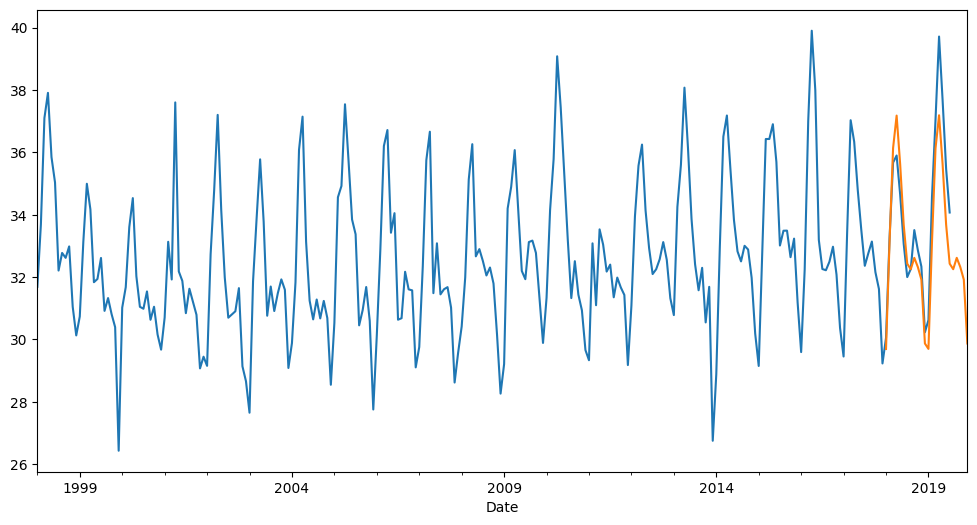

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0, 0, 0), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


RMSE: 1.176173573855127


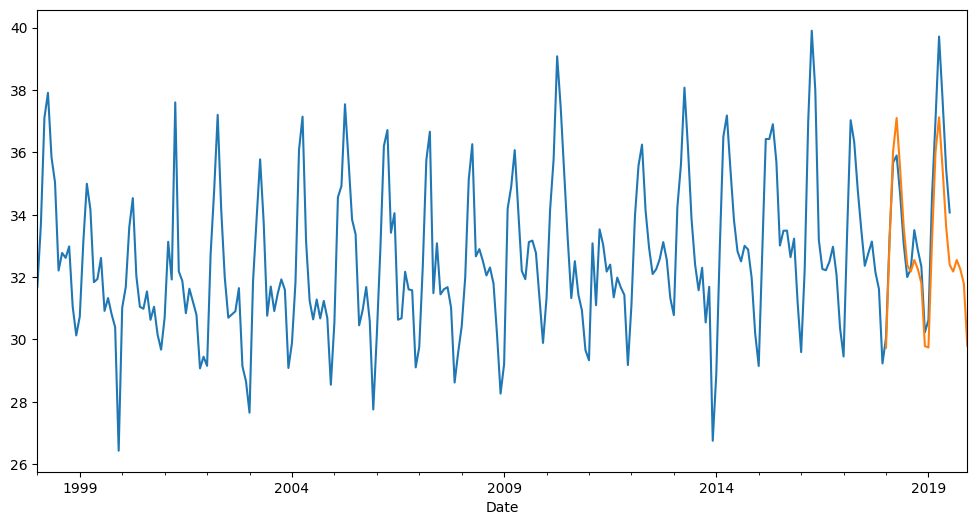

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0, 0, 1), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


RMSE: 1.199637137352148


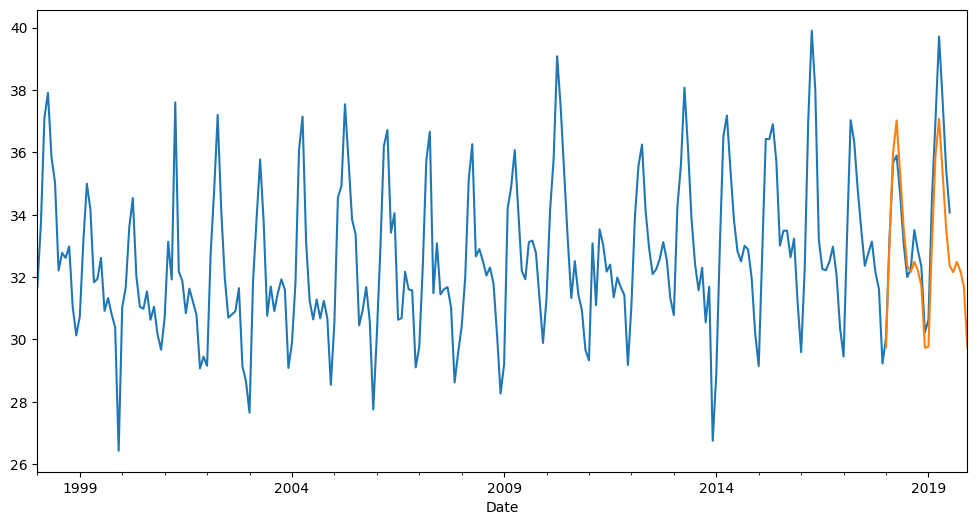

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0, 0, 2), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


RMSE: 1.2883781175329168


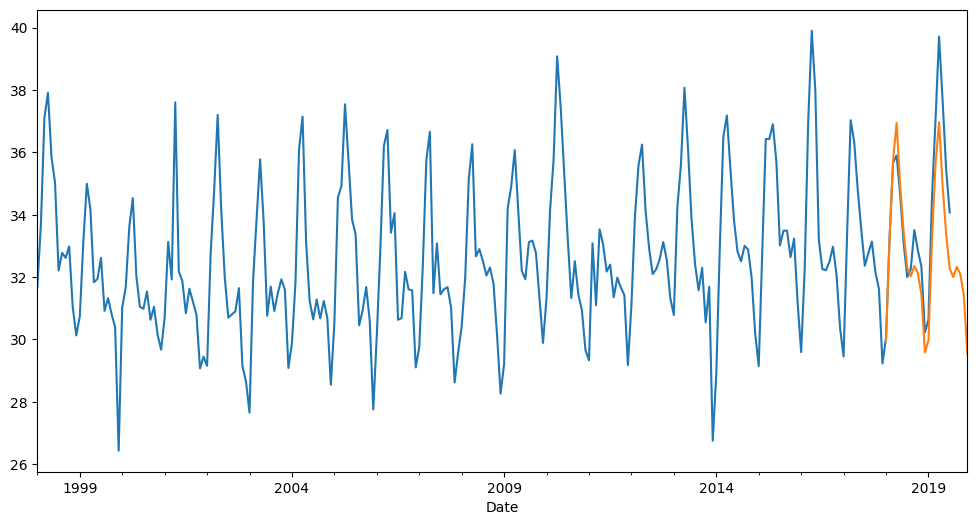

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


RMSE: 1.2299055427820946


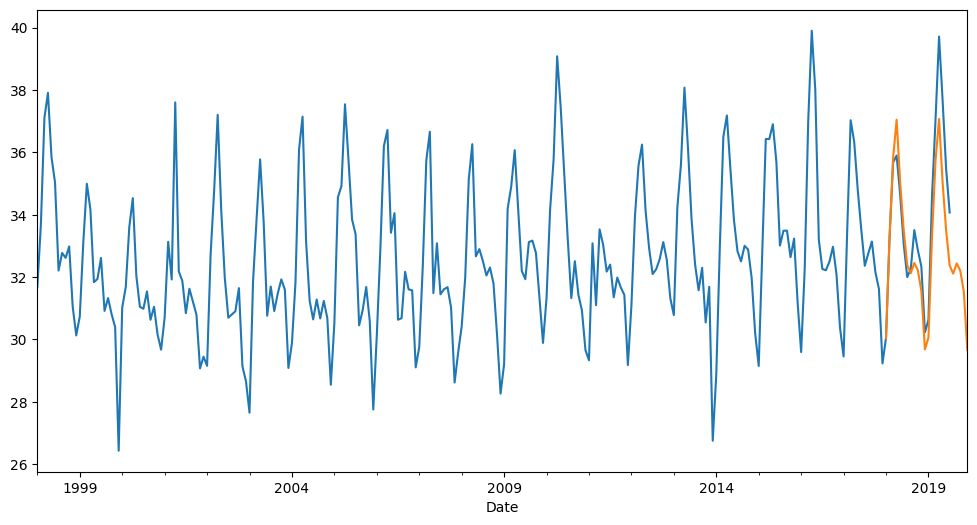

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0, 1, 2), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


RMSE: 1.0373539055674421


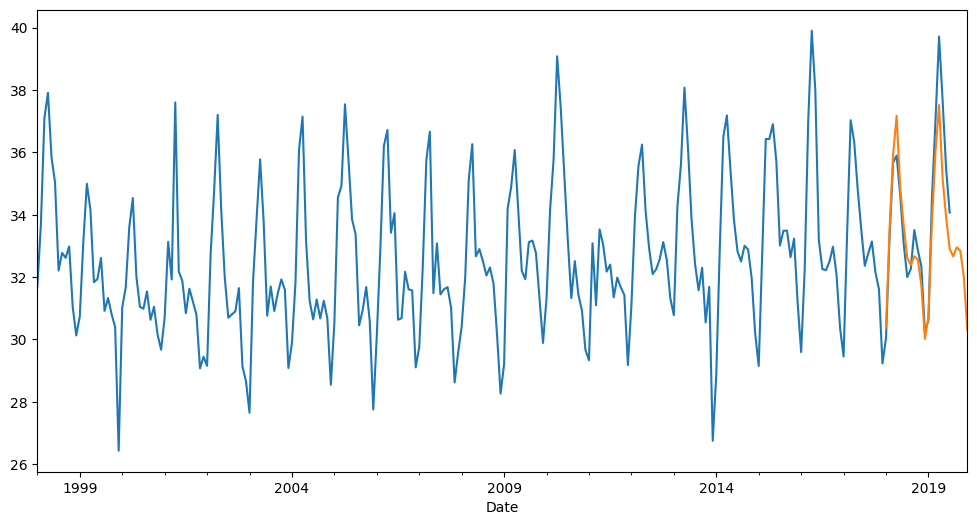

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0, 2, 2), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 0.9703109058985209


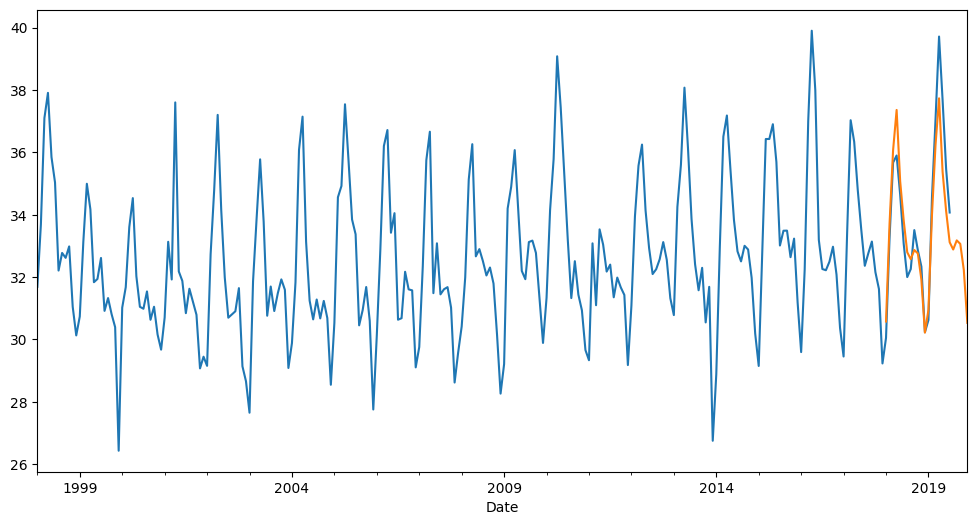

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(1, 2, 2), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


RMSE: 1.0207531290912812


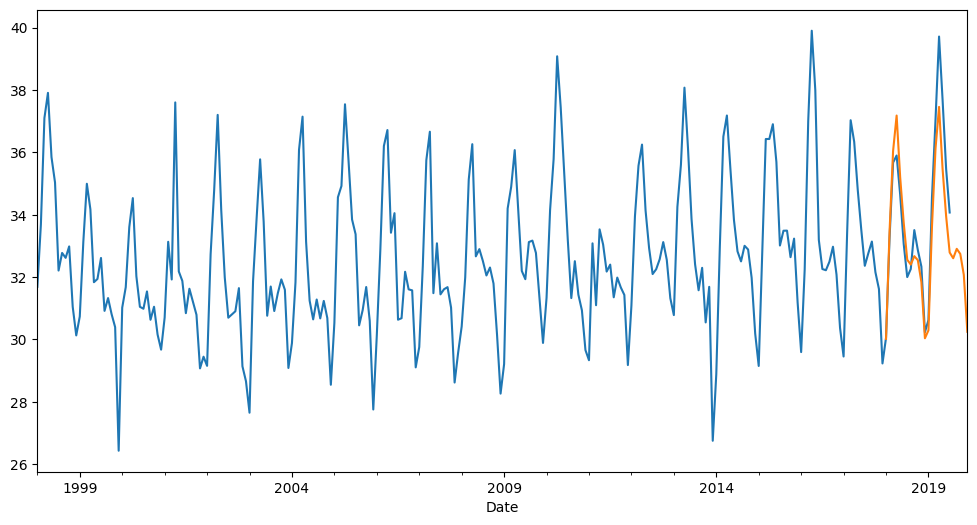

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(2, 2, 2), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


RMSE: 0.9699027083593134


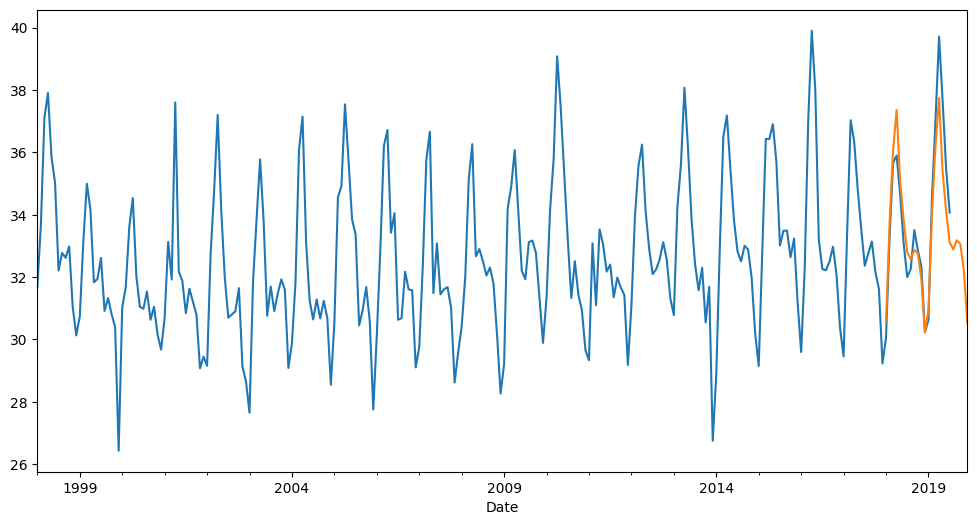

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(2, 2, 3), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maxi

RMSE: 0.9667898426315543


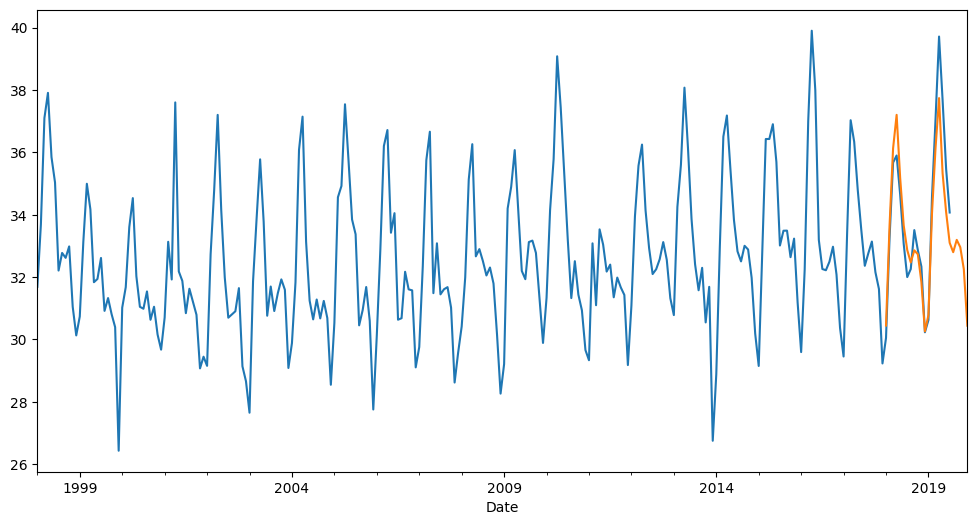

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(3, 2, 4), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 2.0646910788611526


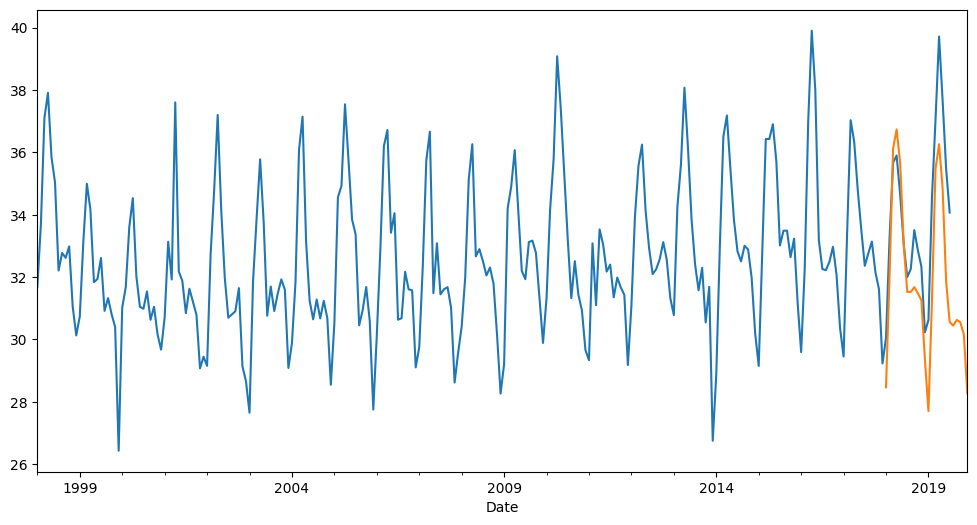

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(2, 2, 3), seasonal_order=(2, 2, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maxi

RMSE: 0.9667898426315543


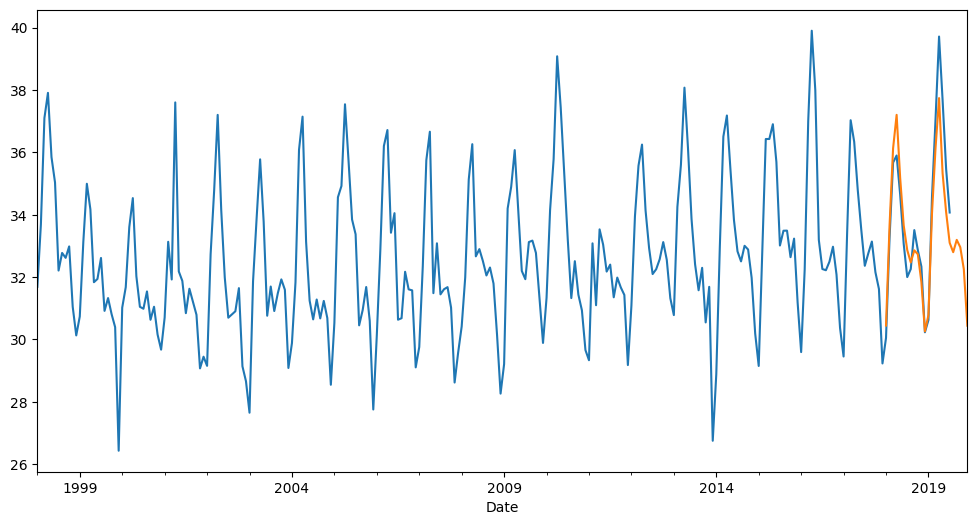

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(3, 2, 4), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2018-01-01', '2019-12-01')

print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

In [73]:
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              MaxTemp   No. Observations:                  235
Model:             SARIMAX(3, 2, 4)x(1, 1, [1], 12)   Log Likelihood                -347.733
Date:                              Thu, 18 Sep 2025   AIC                            715.465
Time:                                      03:34:00   BIC                            749.447
Sample:                                  01-31-1998   HQIC                           729.187
                                       - 07-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6222      0.105    -15.508      0.000      -1.827      -1.417
ar.L2         -0.5991      0.189     -3.178      0.001      -0.969      -0.230
ar.L3          0.1793      0.108      1.654      0.098      -0.033       0.392
ma.L1          0.0411      2.260      0.018      0.985      -4.389       4.471
ma.L2         -1.5348      2.359     -0.651      0.515      -6.158       3.089
ma.L3         -0.2948      1.089     -0.271      0.787      -2.430       1.840
ma.L4          0.7889      1.764      0.447      0.655      -2.668       4.246
ar.S.L12       0.1244      0.105      1.183      0.237      -0.082       0.331
ma.S.L12      -0.9733      0.269     -3.619      0.000      -1.501      -0.446
sigma2         1.1324      2.553      0.444      0.657      -3.871       6.136
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                14.36
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.36
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""